<a href="https://colab.research.google.com/github/ASTRONOE/Experimental_analysis/blob/main/TuringTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from scipy.stats import ttest_ind
from scipy import stats
from scipy.optimize import curve_fit

In [ ]:
drive.mount('/content/drive', force_remount=True)
!cd /content/drive/MyDrive/TuringData

Mounted at /content/drive


In [ ]:
files = glob.glob("/content/drive/MyDrive/TuringData/*csv")
Df = [pd.read_csv(file) for file in files]
Df0, Df1, Df2 = Df[0], Df[1], Df[2]

In [ ]:
print(Df0.shape)
print(Df0.info())
Df0.head()

(56903, 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56903 entries, 0 to 56902
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id;alco  56903 non-null  object
dtypes: object(1)
memory usage: 444.7+ KB
None


,id;alco
0,44;0
1,45;0
2,46;0
3,47;0
4,49;0


In [ ]:
print(Df1.shape)
print(Df1.info())
Df1.head()

(70000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.8 MB
None


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


In [ ]:
print(Df2.shape)
print(Df2.info())
Df2.head()

(23082, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    23082 non-null  object 
 1   date                        23082 non-null  object 
 2   new_cases                   23082 non-null  int64  
 3   new_deaths                  23082 non-null  int64  
 4   population                  23018 non-null  float64
 5   aged_65_older_percent       20643 non-null  float64
 6   gdp_per_capita              20711 non-null  float64
 7   hospital_beds_per_thousand  19144 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB
None


,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5


In [ ]:
Df1.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,0.088129
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.283484
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000


In [ ]:
Df2.describe()

,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
count,23082.000000,23082.000000,2.301800e+04,20643.000000,20711.000000,19144.000000
mean,624.769257,35.629062,1.037003e+08,9.758570,22708.384791,3.204687
std,5517.309068,330.986941,6.716897e+08,6.445662,21187.826121,2.593700
min,-2461.000000,-1918.000000,8.090000e+02,1.144000,661.240000,0.100000
25%,0.000000,0.000000,2.083380e+06,3.853000,6426.674000,1.400000
50%,3.000000,0.000000,9.449321e+06,7.646000,15524.995000,2.600000
75%,55.000000,1.000000,3.346920e+07,15.322000,35220.084000,4.210000
max,133510.000000,10520.000000,7.794799e+09,27.049000,116935.600000,13.800000


In [ ]:
smoking_rates = Df1.groupby('gender')['smoke'].value_counts()

In [ ]:
print(smoking_rates)

gender  smoke
1       0        44717
        1          813
2       0        19114
        1         5356
Name: smoke, dtype: int64


In [ ]:
44717/19114

2.339489379512399

<Axes: ylabel='Frequency'>

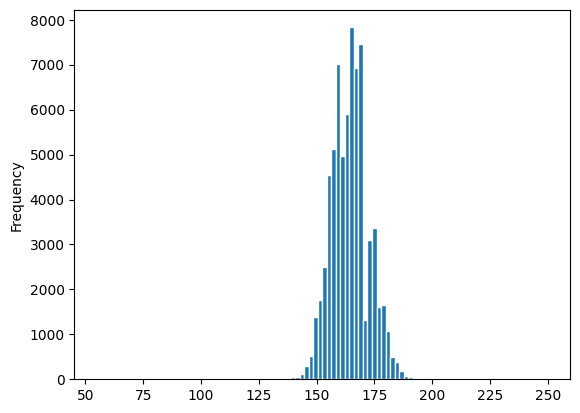

In [ ]:
Df1['height'].plot.hist(bins=100, edgecolor='white')

In [ ]:
Df1.height.sort_values()

22723     55
66643     57
64115     59
29157     60
27603     64
        ... 
40090    198
8897     198
41901    200
21628    207
6486     250
Name: height, Length: 70000, dtype: int64

In [ ]:
Df1.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'smoke'],
      dtype='object')

In [ ]:
corr = Df1.corr(method='spearman')

# find the columns with the largest coefficients
largest = corr['age'].nlargest(3)

In [ ]:
largest

age      1.000000
ap_hi    0.219087
ap_lo    0.156700
Name: age, dtype: float64

In [ ]:
corr_matrix = Df1.corr(method='spearman')

# find the two columns with the highest correlation
highest_corr = corr_matrix.abs().nlargest(2, 'gender').index.tolist()

In [ ]:
H = Df1.height.std()

8.210126364538038

In [ ]:
# calculate the mean and standard deviation of the height column
height_mean = Df1['height'].mean()
height_std = Df1['height'].std()

# calculate the upper and lower bounds for heights that are 2 standard deviations away from the mean
upper_bound = height_mean + 2 * height_std
lower_bound = height_mean - 2 * height_std

# count the number of people whose height falls within this range
num_outliers = Df1[(Df1['height'] > upper_bound) | (Df1['height'] < lower_bound)].shape[0]

# calculate the percentage of people whose height is an outlier
percentage_outliers = 100 * num_outliers / Df1.shape[0]

# print the result
print(f"The percentage of people that are 2 standard deviations away from the average height is {percentage_outliers:.2f}%")

The percentage of people that are 2 standard deviations away from the average height is 3.34%


In [ ]:
Df0[['id', 'alco']] = Df0['id;alco'].str.split(';', expand=True)

# drop the original id_alco column
Df0.drop('id;alco', axis=1, inplace=True)

# convert the id and alco columns to numeric type
Df0['id'] = pd.to_numeric(Df0['id'])
Df0['alco'] = pd.to_numeric(Df0['alco'])

In [ ]:
Df0.head()

,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0


In [ ]:
Df0.describe()

,id,alco
count,56903.000000,56903.000000
mean,48472.162065,0.053442
std,30994.121701,0.224915
min,44.000000,0.000000
25%,20401.000000,0.000000
50%,40763.000000,0.000000
75%,77109.500000,0.000000
max,99954.000000,1.000000


In [ ]:
merged_df = pd.merge(Df0, Df1, on='id')
merged_df.head()

,id,alco,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,44,0,14605,1,159,60.0,110,70,1,0
1,45,0,20652,1,160,73.0,130,85,1,0
2,46,0,21940,2,173,82.0,140,90,3,0
3,47,0,20404,1,163,55.0,120,80,1,0
4,49,0,18328,2,175,95.0,120,80,1,0


In [ ]:
merged_df.describe()

,id,alco,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,56903.000000,56903.000000,56903.000000,56903.000000,56903.000000,56903.000000,56903.000000,56903.000000,56903.000000,56903.000000
mean,48472.162065,0.053442,19469.309966,1.350667,164.356027,74.163482,129.002408,96.752350,1.367872,0.088554
std,30994.121701,0.224915,2466.267893,0.477183,8.215067,14.381791,160.259577,189.390334,0.680889,0.284102
min,44.000000,0.000000,10798.000000,1.000000,55.000000,10.000000,-140.000000,-70.000000,1.000000,0.000000
25%,20401.000000,0.000000,17671.500000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000
50%,40763.000000,0.000000,19701.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000
75%,77109.500000,0.000000,21324.500000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000
max,99954.000000,1.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000


In [ ]:
# subset the dataset to include only individuals over 50 years old
subset_df = df[df['age'] > 50]

# count the number of individuals who consume alcohol in the subset
alcohol_count = subset_df['alco'].sum()

# calculate the total number of individuals in the subset
total_count = subset_df.shape[0]

# calculate the percentage of alcohol consumers
percentage = (alcohol_count / total_count) * 100

# print the percentage
print("Percentage of population over 50 years old who consume alcohol: {:.2f}%".format(percentage))

In [ ]:
merged_df['alco'].value_counts()

0    53862
1     3041
Name: alco, dtype: int64

In [ ]:
53862/3041

17.711936862874055

In [ ]:
smokers = Df1[Df1['smoke'] == 1]
non_smokers = Df1[Df1['smoke'] == 0]

# calculate mean and standard deviation of blood pressure for smokers
smokers_mean_bp = smokers[['ap_hi', 'ap_lo']].mean().mean()
smokers_std_bp = smokers[['ap_hi', 'ap_lo']].std().mean()

# calculate mean and standard deviation of blood pressure for non-smokers
non_smokers_mean_bp = non_smokers[['ap_hi', 'ap_lo']].mean().mean()
non_smokers_std_bp = non_smokers[['ap_hi', 'ap_lo']].std().mean()

# calculate t-statistic and p-value
n_smokers = len(smokers)
n_non_smokers = len(non_smokers)
deg_of_freedom = n_smokers + n_non_smokers - 2

pooled_std_error = np.sqrt(((n_smokers-1)*(smokers_std_bp**2) + (n_non_smokers-1)*(non_smokers_std_bp**2)) / deg_of_freedom * (1/n_smokers + 1/n_non_smokers))

t = (smokers_mean_bp - non_smokers_mean_bp) / pooled_std_error
p_value = stats.t.sf(np.abs(t), deg_of_freedom)*2

# calculate confidence interval
smokers_ci = stats.t.interval(0.95, n_smokers-1, loc=smokers_mean_bp, scale=smokers_std_bp/np.sqrt(n_smokers))
non_smokers_ci = stats.t.interval(0.95, n_non_smokers-1, loc=non_smokers_mean_bp, scale=non_smokers_std_bp/np.sqrt(n_non_smokers))

# calculate confidence interval in percentage
smokers_ci_perc = tuple([round(ci/smokers_mean_bp*100, 2) for ci in smokers_ci])
non_smokers_ci_perc = tuple([round(ci/non_smokers_mean_bp*100, 2) for ci in non_smokers_ci])

# print results
print(f"Mean blood pressure for smokers: {round(smokers_mean_bp, 2)}")
print(f"Mean blood pressure for non-smokers: {round(non_smokers_mean_bp, 2)}")
print(f"Standard deviation of blood pressure for smokers: {round(smokers_std_bp, 2)}")
print(f"Standard deviation of blood pressure for non-smokers: {round(non_smokers_std_bp, 2)}")
print(f"T-statistic: {round(t, 2)}")
print(f"P-value: {p_value}")
print(f"95% confidence interval for smokers: {smokers_ci_perc}")
print(f"95% confidence interval for non-smokers: {non_smokers_ci_perc}")


Mean blood pressure for smokers: 114.07
Mean blood pressure for non-smokers: 112.59
Standard deviation of blood pressure for smokers: 93.73
Standard deviation of blood pressure for non-smokers: 175.71
T-statistic: 0.65
P-value: 0.5158362384333088
95% confidence interval for smokers: (97.95, 102.05)
95% confidence interval for non-smokers: (98.79, 101.21)


In [ ]:
Df2.columns

Index(['location', 'date', 'new_cases', 'new_deaths', 'population',
       'aged_65_older_percent', 'gdp_per_capita',
       'hospital_beds_per_thousand'],
      dtype='object')

In [ ]:
Df2["cumulative_cases"] = Df2.groupby("location")["new_cases"].cumsum()

In [ ]:
# Filter the dataframe to only include rows for Italy and Germany
italy_germany = Df2[Df2["location"].isin(["Italy", "Germany"])]

# Group the data by date and sum the cumulative cases for Italy and Germany
italy_germany_total_cases = italy_germany.groupby("date")["cumulative_cases"].sum()

# Find the date when the total number of cases exceeded 10000
date = italy_germany_total_cases[italy_germany_total_cases > 10000].index.min()

print("The total number of cases for Italy and Germany combined exceeded 10000 on:", date)


The total number of cases for Italy and Germany combined exceeded 10000 on: 2020-03-10


In [ ]:
italy_data = Df2.loc[(Df2.location == "Italy") & (Df2.date >= "2020-02-28") & (Df2.date <= "2020-03-20")]

# Calculate the cumulative sum of cases
italy_data["cumulative_cases"] = italy_data.new_cases.cumsum()

# Define the exponential function
def exp_func(x, a, b):
    return a * np.exp(b * x)

# Fit the exponential function to the data
x_data = np.arange(len(italy_data))
y_data = italy_data.cumulative_cases.values
popt, pcov = curve_fit(exp_func, x_data, y_data)

# Calculate the predicted values using the fitted parameters
y_fit = exp_func(x_data, *popt)

# Print the parameters of the fitted exponential function
print("Fitted parameters: a = %.2f, b = %.4f" % (popt[0], popt[1]))


Fitted parameters: a = 1473.74, b = 0.1599


<ipython-input-119-31310e44fb4f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_data["cumulative_cases"] = italy_data.new_cases.cumsum()


In [ ]:
# Calculate the predicted value of the exponential function on day 21
day_21_pred = exp_func(21, *popt)

# Find the actual number of cases on day 21
day_21_actual = italy_data.loc[italy_data.date == "2020-03-20", "cumulative_cases"].values[0]

# Calculate the difference
diff = day_21_actual - day_21_pred

print("Difference between actual and predicted value on 2020-03-20: %.2f" % diff)


Difference between actual and predicted value on 2020-03-20: -1711.69


In [ ]:
Df2['death_rate'] = Df2['new_deaths'] / Df2['population']

# sort the countries by death rate in descending order
df = Df2.sort_values('death_rate', ascending=False)

# print the top 3 countries with the highest death rates
print(df.iloc[2]['location'])


San Marino


In [ ]:
# Group by country and sum up the new deaths
deaths_by_country = Df2.groupby("location")["new_deaths"].sum()

# Sort the values in descending order
deaths_by_country = deaths_by_country.sort_values(ascending=False)

# Print the country with the highest deaths
print(deaths_by_country.index[2])


United Kingdom


In [ ]:
Df2['death_rate'] = (Df2['new_deaths'] / Df2['population']) * 1000000


In [ ]:
third_highest = Df2.sort_values(by='death_rate', ascending=False).iloc[2]['location']
print(third_highest)


San Marino


In [ ]:
# Count the number of countries that have 5 hospital beds per 1000 inhabitants
num_5_hospital_beds = len(Df2[Df2['hospital_beds_per_thousand'] == 5])

# Estimate P(hospital beds = 5)
p_5_hospital_beds = num_5_hospital_beds / len(Df2)

# Count the number of countries that have a GDP over $10,000 and 5 hospital beds per 1000 inhabitants
num_gdp_over_10k_and_5_hospital_beds = len(Df2[(Df2['gdp_per_capita'] > 10000) & (Df2['hospital_beds_per_thousand'] == 5)])

# Estimate P(hospital beds = 5 | GDP > $10,000)
p_5_hospital_beds_given_gdp_over_10k = num_gdp_over_10k_and_5_hospital_beds / len(Df2[Df2['gdp_per_capita'] > 10000])

# Estimate P(GDP > $10,000)
p_gdp_over_10k = len(Df2[Df2['gdp_per_capita'] > 10000]) / len(Df2)

# Calculate P(GDP > $10,000 | hospital beds = 5) using Bayes' theorem
p_gdp_over_10k_given_5_hospital_beds = p_5_hospital_beds_given_gdp_over_10k * p_gdp_over_10k / p_5_hospital_beds

print(f"The probability that a country has a GDP of over $10,000 given they have 5 hospital beds per 1000 inhabitants is: {p_gdp_over_10k_given_5_hospital_beds:.4f}")


The probability that a country has a GDP of over $10,000 given they have 5 hospital beds per 1000 inhabitants is: 1.0000


In [ ]:
# filter for countries with 5 hospital beds per 1000 inhabitants
filtered_df = Df2[Df2['hospital_beds_per_thousand'] == 5]

# find the probability that a country has a GDP over $10,000 given they have 5 hospital beds per 1000 inhabitants
p_gdp_over_10k_given_5_beds = len(filtered_df[filtered_df['gdp_per_capita'] > 10000]) / len(filtered_df)

# print the probability
print(f"The probability that a country has a GDP of over $10,000 given they have 5 hospital beds per 1000 inhabitants is: {p_gdp_over_10k_given_5_beds}")


The probability that a country has a GDP of over $10,000 given they have 5 hospital beds per 1000 inhabitants is: 1.0
